In [1]:

!pip install tensorflow

# Matplotlib for plotting
!pip install matplotlib

# Pillow (for image processing, included in TensorFlow but for completeness):
!pip install pillow

!pip install h5py

In [2]:
from google.colab import drive
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os


In [3]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set the paths for your dataset stored in Google Drive
train_data_dir = '/content/drive/MyDrive/telugu_one_class/train'  # Path with two subfolders: 'telugu' and 'not_telugu'
test_data_dir = '/content/drive/MyDrive/telugu_one_class/test'    # Same structure for the test directory
save_model_path = '/content/drive/MyDrive/lenet_1/model_lenet.h5'  # Path to save the trained model

Mounted at /content/drive


In [4]:
# Constants
im_shape = (227, 227, 3)  # Image input shape
BATCH_SIZE = 32
epochs = 10

In [5]:
# Check if saved model exists
if os.path.exists(save_model_path):
    print("Loading the saved model...")
    model = load_model(save_model_path)  # Load the saved model
else:
    # Define the LeNet model
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=im_shape),  # First conv layer
        MaxPooling2D(pool_size=(2, 2)),  # First pooling layer
        Conv2D(16, kernel_size=(5, 5), activation='relu'),  # Second conv layer
        MaxPooling2D(pool_size=(2, 2)),  # Second pooling layer
        Flatten(),  # Flatten the feature maps into a 1D vector
        Dense(120, activation='relu'),  # Fully connected layer 1
        Dense(84, activation='relu'),   # Fully connected layer 2
        Dense(1, activation='sigmoid')  # Binary classification output (Telugu or not)
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # ImageDataGenerator for data augmentation and loading
    data_generator = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,  # 20% validation split
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    # Load training and validation data from directories
    train_generator = data_generator.flow_from_directory(
        train_data_dir, target_size=(227, 227), batch_size=BATCH_SIZE, class_mode='binary', subset='training')

    validation_generator = data_generator.flow_from_directory(
        train_data_dir, target_size=(227, 227), batch_size=BATCH_SIZE, class_mode='binary', subset='validation')

    # Step 3: Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )

    # Save the model after training
    model.save(save_model_path)
    print(f"Model saved at {save_model_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 3429 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 1293s 12s/step - accuracy: 0.6792 - loss: 1.1179 - val_accuracy: 0.7861 - val_loss: 0.4274
Epoch 2/5
  1/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8125 - loss: 0.5133

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.8125 - loss: 0.5133 - val_accuracy: 0.6667 - val_loss: 0.5655
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 122s 734ms/step - accuracy: 0.7858 - loss: 0.4463 - val_accuracy: 0.8774 - val_loss: 0.3081
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.4933 - val_accuracy: 0.8750 - val_loss: 0.3382
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 142s 744ms/step - accuracy: 0.8185 - loss: 0.3806 - val_accuracy: 0.7969 - val_loss: 0.3722


Model saved at /content/drive/MyDrive/lenet_1/model_lenet.h5


In [6]:
# Step 4: Evaluate the model
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_data_dir, target_size=(227, 227), batch_size=BATCH_SIZE, class_mode='binary')

score = model.evaluate(test_generator)
print(f'Test accuracy: {score[1]*100:.2f}%')

Found 1351 images belonging to 2 classes.
43/43 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - accuracy: 0.6862 - loss: 0.5766
Test accuracy: 67.95%


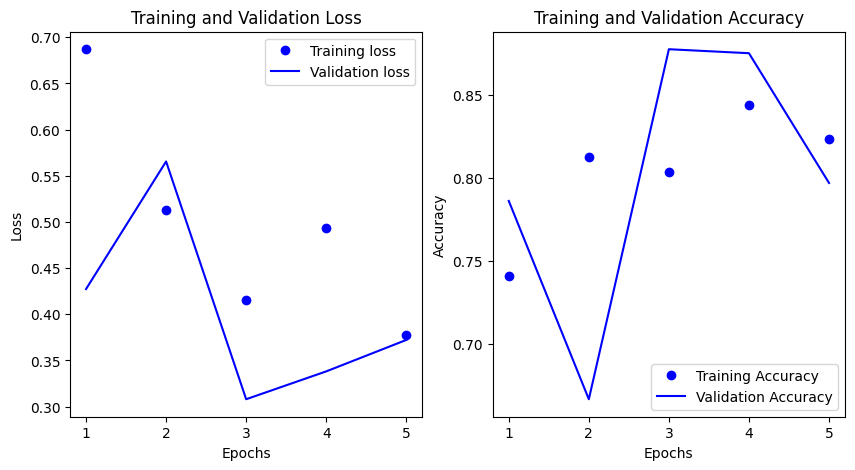

In [7]:
# Step 5: Plot training and validation accuracy/loss (optional)
history_dict = history.history if 'history' in locals() else None  # Check if training was done in this run
if history_dict:
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs_range = range(1, len(loss_values) + 1)

    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_range, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
    plt.plot(epochs_range, val_acc_values, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [9]:
# Step 6: Predict on a new image (for anomaly detection - is Telugu present or not)
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(227, 227))  # Use 227x227 for LeNet
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

def predict_telugu_presence(img_path, model):
    preprocessed_img = preprocess_input_image(img_path)
    prediction = model.predict(preprocessed_img)
    if prediction >= 0.5:
        return "Telugu Detected"
    else:
        return "Telugu Not Detected"

In [12]:
# Step 7: Test the model on a new image
input_image_path = '/content/story_1.png'  # Specify the image path in your Google Drive
result = predict_telugu_presence(input_image_path, model)
print(f'Prediction: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: Telugu Detected


In [ ]:
# Importing libraries
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration
from PIL import Image

# Path to the image
img_path = '/content/story_1.png'

# Increasing contrast and decreasing brightness
im = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
im = im * 1.5 - 70
cv2.imwrite('poster_contrast.jpeg', im)
img_const = 'poster_contrast.jpeg'

# Resizing the image to 300x300
img = Image.open(img_const)
img.save("poster_resize.jpeg", "JPEG", dpi=(300, 300))
img_resize = "poster_resize.jpeg"
Image.open(img_resize)

# Using EasyOCR to read the image for text in Telugu and English languages
reader = easyocr.Reader(['en', 'te'], gpu=True)
bounds = reader.readtext(img_path)

# Displaying the image
img = np.array(img)
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

# Enhanced sorting by top-to-bottom and left-to-right reading order
def sort_by_reading_order(bounds, tolerance_y=20, tolerance_x=10):
    """
    Sort text by reading order:
    1. Group words that appear on the same line (based on the y-coordinates).
    2. Sort by x-coordinates within each line.

    :param bounds: OCR bounding boxes and text information.
    :param tolerance_y: Tolerance in y-coordinate to treat words as being on the same line.
    :param tolerance_x: Minimum difference in x-coordinate to avoid overlapping words.
    :return: Sorted list of text in reading order.
    """
    # Sort first by the top-left corner's y-coordinate, then by the x-coordinate
    bounds = sorted(bounds, key=lambda x: (x[0][0][1], x[0][0][0]))

    lines = []  # Will hold all the sorted lines
    current_line = []  # Holds words on the current line
    current_y = bounds[0][0][0][1]  # Initial y-coordinate for grouping

    for bound in bounds:
        box = bound[0]  # Bounding box
        text = bound[1]  # Detected text
        box_y = box[0][1]  # Top-left corner y-coordinate of the box

        # Check if the word is on a new line (based on y-coordinate)
        if abs(box_y - current_y) > tolerance_y:
            # Sort the current line by x-coordinate and add to the lines
            current_line = sorted(current_line, key=lambda b: b[0][0][0])  # Sort by x
            lines.append(current_line)
            current_line = []  # Start a new line
            current_y = box_y  # Update the current y-coordinate

        current_line.append(bound)

    # Add the last line
    if current_line:
        current_line = sorted(current_line, key=lambda b: b[0][0][0])  # Sort by x
        lines.append(current_line)

    # Flatten the list of lines into a single list of text in reading order
    sorted_texts = [word[1] for line in lines for word in line]
    return sorted_texts

# Sort the detected text
sorted_texts = sort_by_reading_order(bounds)

# Combine sorted Telugu text
telugu_text = ' '.join(sorted_texts)

# Output the sorted Telugu text
print("Original Telugu Text:", telugu_text)


In [ ]:
from transformers import MBartForConditionalGeneration, MBart50Tokenizer

# Load the mBART-50 model and tokenizer
model_name = "facebook/mbart-large-50-many-to-many-mmt"
model = MBartForConditionalGeneration.from_pretrained(model_name)
tokenizer = MBart50Tokenizer.from_pretrained(model_name)

# Set the source and target languages (Telugu and English)
tokenizer.src_lang = "te_IN"  # Telugu
target_lang = "en_XX"  # English

# Your input Telugu text
telugu_text = " ".join(sorted_texts)

# Tokenize the input Telugu text
inputs = tokenizer(telugu_text, return_tensors="pt", max_length=512, truncation=True)
# Generate the translation
translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id[target_lang])
# Decode the translation tokens to English text
translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

print("Translated English Text:", translated_text)


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load the PEGASUS tokenizer and model
model_name = "google/pegasus-xsum"  # You can also try pegasus-large
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

# Example text you want to summarize
text = translated_text

# Tokenize the input text
inputs = tokenizer([text], max_length=1024, return_tensors="pt", truncation=True)

# Generate summary
summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

# Decode and print the summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Summarized Text:")
print(summary)
